In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit import *
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
import turtle 
import numpy as np


# Loading your IBM Q account(s)

IBMQ.save_account('f8f512e66825dbbf9a32adb61fea9ef136de434137db758ad036511c34ee98a15d0795ef5e68344a4aaf23fb6e66d97aa5416bb3cbcacb04cd7450fe5e2862b6')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-04-12 23:52:23,855: Credentials already present. Set overwrite=True to overwrite.


In [2]:
class UserInteraction():
    def __init__(self):
        self.str_q0 = "q0 -"
        self.str_q1 = "q1 -"
        self.wire = "-----------"
        
        #Initial position in grid
        self.i, self.j = [0,1]
        #Creates grid
        '''
        self.grid=np.matrix([[0,0,3,2,0],
                            [1,0,1,0,1],
                            [1,0,0,0,1],
                            [1,1,1,1,1]])
        
        self.grid=np.matrix([[1,0,1,1,1,1,1,1],
                            [1,0,0,0,0,1,1,1],
                            [1,1,1,1,0,1,1,1],
                            [1,1,1,1,0,1,1,1],
                            [1,1,1,1,0,0,0,1],
                            [1,1,1,1,1,1,0,1],
                            [0,2,0,0,0,0,0,1],
                            [1,1,1,1,1,1,1,1]]
)
     '''   
        self.grid=np.matrix([[1,2,1,1,1,1,1,1],
                [1,0,0,0,0,1,1,1],
                [1,1,1,1,0,1,1,1],
                [1,1,1,1,0,1,1,1],
                [1,1,1,1,0,0,0,1],
                [0,0,0,1,1,1,0,1],
                [1,1,0,0,0,0,0,1],
                [1,1,1,1,1,1,1,1]])
        
        self.tun=0
    
    def apply_gates(self):
        print('\n')
        print('--------NEW MOVEMENT--------')
        print("Insert gates you want to apply (Ex: H-X-H-R)")
        
        if level==0:
            q0 = input("q0--")
            q1 = input("q1--")
        elif level==1:
            q0 = input("q0--H-")
            q1 = input("q1--H-")
        elif level==2:
            q0 = input("q0--R-")
            q1 = input("q1-----")
        
        self.gates_q0 = []
        self.gates_q1 = []
        for gate in q0:
            if gate != "-":
                self.gates_q0.append(gate)
        
        for gate in q1:
            if gate != "-":
                self.gates_q1.append(gate)
        
        self.generate_circuit(self.gates_q0,self.gates_q1)
        
        
    def generate_circuit(self,list0, list1):
        circ = QuantumCircuit(2)
        
        if level==0:
            circ.reset(0)
            circ.reset(1)
        elif level==1:
            circ.h(0)
            circ.h(1)
        elif level==2:
            circ.rx(np.pi/2,0)
            circ.reset(1)

        
        #gates q0
        for gate in list0:
            if gate == 'X':
                circ.x(0)
            elif gate == 'H':
                circ.h(0)
            elif gate == 'R':
                circ.rx(np.pi/2,0)
        
        #gates q1
        for gate in list1:
            if gate == 'X':
                circ.x(1)
            elif gate == 'H':
                circ.h(1)
            elif gate == 'R':
                circ.rx(np.pi/2,1)
        
        #Creating the measurement
        meas = QuantumCircuit(2,2)
        meas.barrier(range(2))
        meas.measure(range(2), range(2))
        
        
        self.qc = circ+meas
        print(self.qc)
    
    def movement(self):
        
        
        #Measurement
        simulator = Aer.get_backend('qasm_simulator')
        compiled_circuit = transpile(self.qc, simulator)
        
        #initialize dictonary
        counts= {
          "00": 0,
          "01": 0,
          "10": 0,
          "11": 0
        }
     
        counts_total= {
          "00": 0,
          "01": 0,
          "10": 0,
          "11": 0
        }
        # Execute the circuit on the qasm simulator
        job_total =execute(self.qc, simulator, shots=1000)
        job = execute(self.qc, simulator, shots=1)

        # Grab results from the job
        result = job.result()
        result_total = job_total.result()
        
        # Returns counts
        self.counts = result.get_counts(self.qc)
        self.counts_total = result_total.get_counts(self.qc)
        
        #Movement
        max_counts=900

        #Makes sure to get every state in the dictionary (even if it has 0 counts)
        self.counts_total['00']=self.counts_total.get('00', 0)/1000
        self.counts_total['01']=self.counts_total.get('01', 0)/1000
        self.counts_total['10']=self.counts_total.get('10', 0)/1000
        self.counts_total['11']=self.counts_total.get('11', 0)/1000

        #Makes sure to get every state in the dictionary (even if it has 0 counts)
        self.counts['00']=self.counts.get('00', 0)
        self.counts['01']=self.counts.get('01', 0)
        self.counts['10']=self.counts.get('10', 0)
        self.counts['11']=self.counts.get('11', 0)

        # 00: DOWN
        if self.counts["00"]==1:
            if self.grid[self.i+1,self.j]==0:
                self.grid[self.i,self.j]=0
                self.grid[(self.i+1),self.j]=2
                self.i+=1
            elif self.grid[self.i+1,self.j]==1:
                num_walls = 1
                
                #We check how many walls there are
                for n in range(self.i+2,np.shape(self.grid)[0]):
                    if self.grid[n,self.j]==1:
                        num_walls += 1
                    elif self.grid[n,self.j]==0:
                        #Tunneling is possible
                        self.tun = 1
                        break
                    else:
                        #Tunneling not possible
                        self.tun = 0
                        break
                if self.tun == 1:
                    #If the num of walls is higher then the probability
                    #of tunneling reduces
                    prob = num_walls * 20
                    x = np.random.randint(0,prob)
                    y = np.random.randint(0,prob)
                    if x == y:
                        self.grid[self.i,self.j]=0
                        if self.i+num_walls+1 > np.shape(self.grid)[0]:
                            self.grid[self.i,self.j]=2
                        else:
                            self.grid[self.i+num_walls+1,self.j]=2
                            self.i+=num_walls+1
                    else:
                        print('Tunneling failed... Try again')
                else:
                    print('Impossible movement. (Tunneling not possible!)')
            else:
                print('Impossible movement')
                

        #01: UP
        elif self.counts["01"]==1:
            if self.grid[self.i-1,self.j]==0:
                self.grid[self.i,self.j]=0
                self.grid[self.i-1,self.j]=2
                self.i += -1
            elif self.grid[self.i-1,self.j]==1:
                num_walls = 1
                
                #We check how many walls there are
                for n in range(2,self.i+1):
                    k = self.i-n
                    if self.grid[n,self.j]==1 and k > 0:
                        num_walls += 1
                    elif self.grid[n,self.j]==0:
                        #Tunneling is possible
                        self.tun = 1
                        break
                    else:
                        #Tunneling not possible
                        self.tun = 0
                        break
                if self.tun == 1:
                    #If the num of walls is higher then the probability
                    #of tunneling reduces
                    prob = num_walls * 20
                    x = np.random.randint(0,prob)
                    y = np.random.randint(0,prob)
                    if x == y:
                        self.grid[self.i,self.j]=0
                        if self.i-num_walls-1 < 0:
                            self.grid[self.i,self.j]=2
                        else:
                            self.grid[self.i-num_walls-1,self.j]=2
                            self.i+=-(num_walls+1)
                    else:
                        print('Tunneling failed... Try again')
                else:
                    print('Impossible movement. (Tunneling not possible!)')
            else:
                print('Impossible movement')
                
                
        #10: RIGHT        
        elif self.counts["10"]==1:
            if self.grid[self.i,self.j+1]==0:
                self.grid[self.i,self.j]=0
                self.grid[self.i,self.j+1]=2
                self.j += 1
            elif self.grid[self.i,self.j+1]==1:
                num_walls = 1
                
                #We check how many walls there are
                for n in range(self.j+2,np.shape(self.grid)[1]):
                    if self.grid[self.i,n]==1:
                        num_walls += 1
                    elif self.grid[self.i,n]==0:
                        #Tunneling is possible
                        self.tun = 1
                        break
                    else:
                        #Tunneling not possible
                        self.tun = 0
                        break
                if self.tun == 1:
                    #If the num of walls is higher then the probability
                    #of tunneling reduces
                    prob = num_walls * 20
                    x = np.random.randint(0,prob)
                    y = np.random.randint(0,prob)
                    if x == y:
                        self.grid[self.i,self.j]=0
                        if self.j+num_walls+1 > np.shape(self.grid)[0]:
                            self.grid[self.i,self.j]=2
                        else:
                            self.grid[self.i,self.j+num_walls+1]=2
                            self.j+=num_walls+1
                    else:
                        print('Tunneling failed... Try again')
                else:
                    print('Impossible movement. (Tunneling not possible!)')
            else:
                print('Impossible movement')

        #11: LEFT
        elif self.counts["11"]==1:
            if self.grid[self.i,self.j-1]==0:
                self.grid[self.i,self.j]=0
                self.grid[self.i,self.j-1]=2
                self.j += -1
            elif self.grid[self.i,self.j-1]==1:
                num_walls = 1
                
                #We check how many walls there are
                for n in range(2,self.j+1):
                    k = self.j-n
                    if self.grid[self.i,n]==1 and k > 0:
                        num_walls += 1
                    elif self.grid[self.i,n]==0:
                        #Tunneling is possible
                        self.tun = 1
                        break
                    else:
                        #Tunneling not possible
                        self.tun = 0
                        break
                if self.tun == 1:
                    #If the num of walls is higher then the probability
                    #of tunneling reduces
                    prob = num_walls * 20
                    x = np.random.randint(0,prob)
                    y = np.random.randint(0,prob)
                    if x == y:
                        self.grid[self.i,self.j]=0
                        if self.j-num_walls-1 < 0:
                            self.grid[self.i,self.j]=2
                        else:
                            self.grid[self.i,self.j-num_walls-1]=2
                            self.i+=-(num_walls+1)
                    else:
                        print('Tunneling failed... Try again')
                else:
                    print('Impossible movement. (Tunneling not possible!)')
            else:
                print('Impossible movement')
        
        keys = self.counts_total. keys()
        values = self.counts_total. values()
        histo=plt. bar(keys, values)
        plt.xlabel('States', fontsize = 10)
        plt.ylabel('Probabilities', fontsize = 10)
       
        #histo=plt.bar(list(self.counts_total()), self.counts_total.values(), color='g')
        
        #print(self.grid)
        #print(plt. bar(keys, values))
        return self.grid, plt. show(histo)



In [3]:
wn=turtle.Screen()
wn.bgcolor("black")
wn.title("Laberinto")
wn.setup(500,500)


#Greed
class Pen(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("square")
        self.color("white")
        self.penup()
        self.speed(0)

#We define "the player"
class Player(turtle.Turtle):
    def __init__(self):
        turtle.Turtle.__init__(self)
        self.shape("circle")
        self.color("red")
        self.penup()
        self.speed(0)

#This class represents the movement
class Movimiento():
    def __init__(self,posit,coord):
        self.pos = posit
        self.coord = coord
        self.screen_x = -100+24
        self.screen_y = 100
        self.x = 0
        self.y = 0
        
    
    #pongo cuadrados en lugar de X
    def iniciar_lab(self,nivel,matrix):
        row,col = np.shape(matrix)
        for fila in range(row):
            for columna in range(col):
                letra_x=nivel[fila,columna]
                self.screen_x=-100+(columna*24)
                self.screen_y=100-(fila*24)
                
                if letra_x==1:
                    pen.goto(self.screen_x,self.screen_y)
                    pen.stamp()

                if letra_x==2: #añado mi jugador en la P
                    player.goto(self.screen_x,self.screen_y)
                

    #This function 
    def moviment(self, matrix): 
        for i in range(np.shape(matrix)[0]):
            for j in range(np.shape(matrix)[1]):
                p = matrix[i,j]
                
                if p == 2:
                    self.screen_x = -100+(j-self.x)*24
                    self.screen_y = 100-(i-self.y)*24
                    player.goto(self.screen_x,self.screen_y)
                
                
                    self.x = j
                    self.y = i
                
 



Initial position:
[[1 2 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   


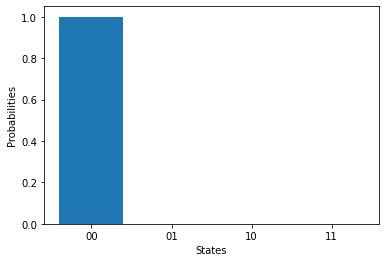

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


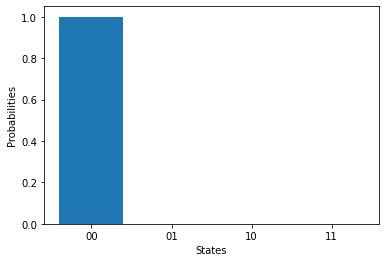

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


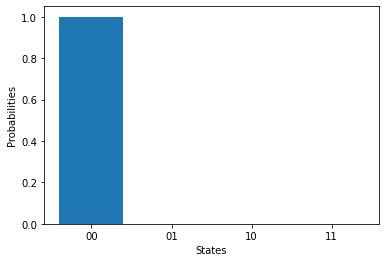

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


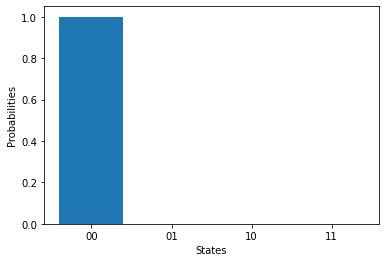

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


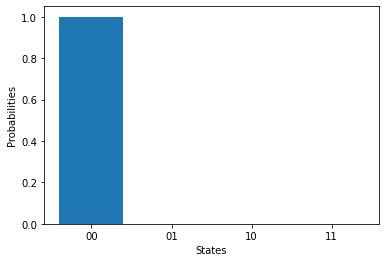

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


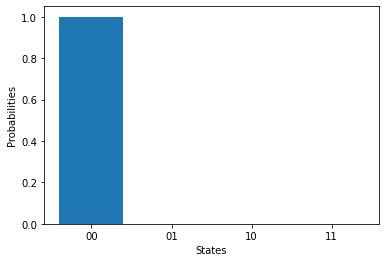

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


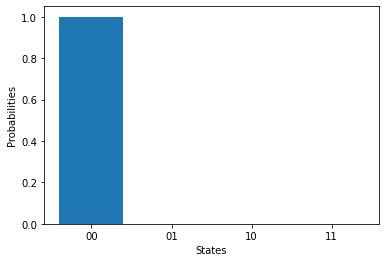

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


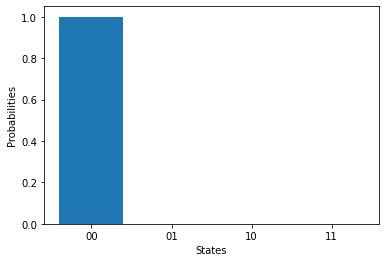

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


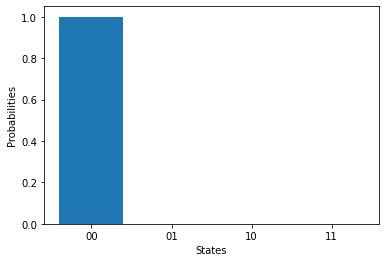

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


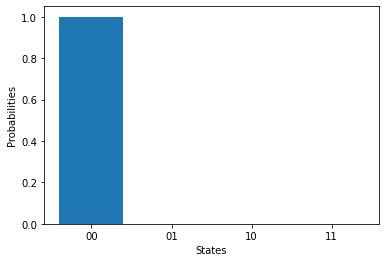

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


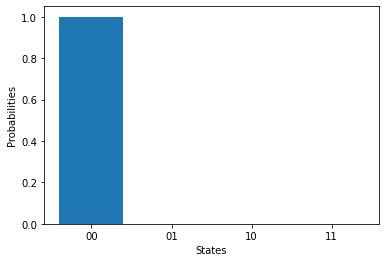

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


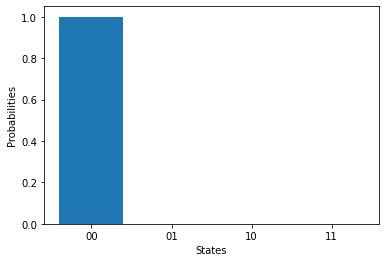

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


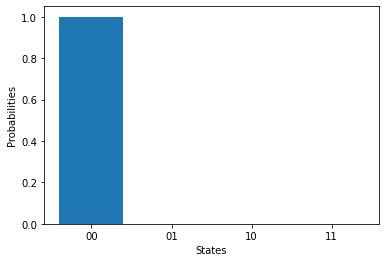

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


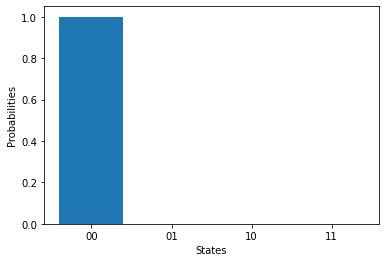

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


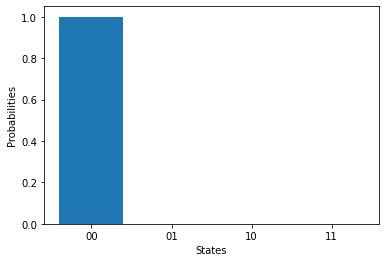

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


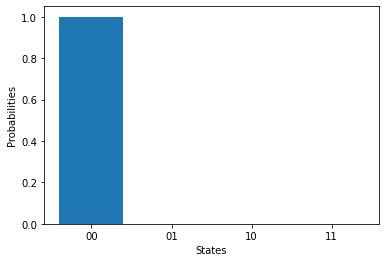

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


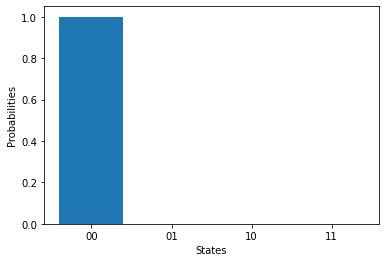

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


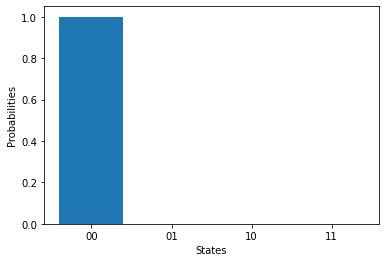

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


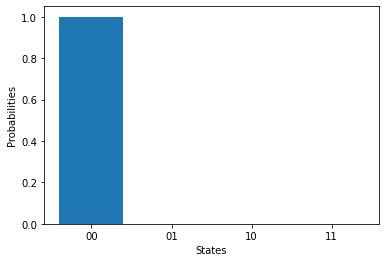

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


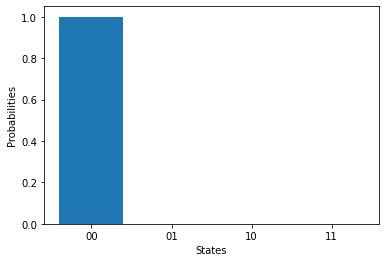

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


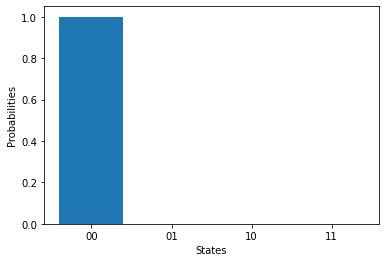

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


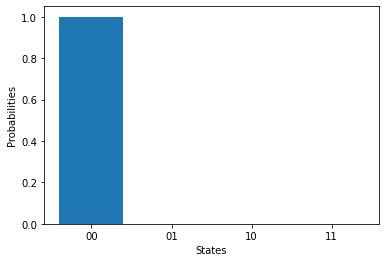

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


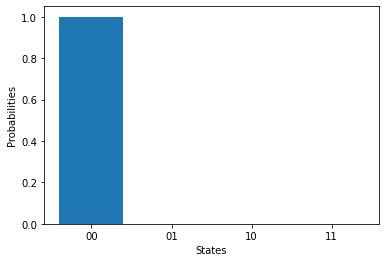

q0--
This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


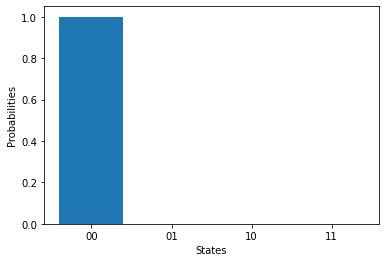

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


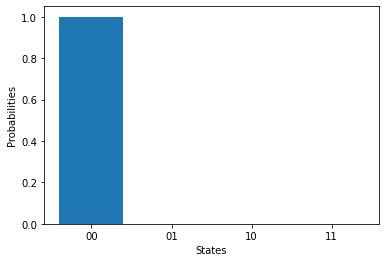

q0--
This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


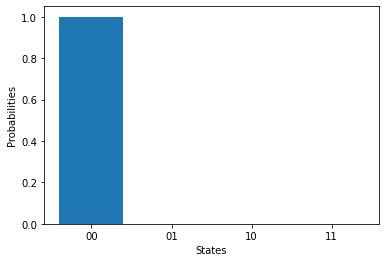

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


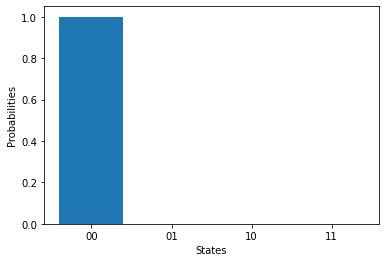

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


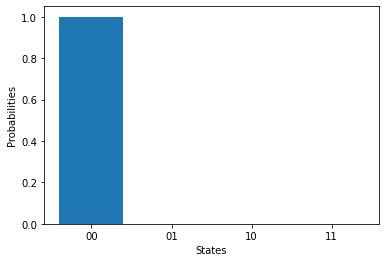

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 2 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   


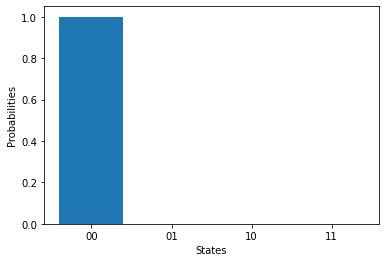

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


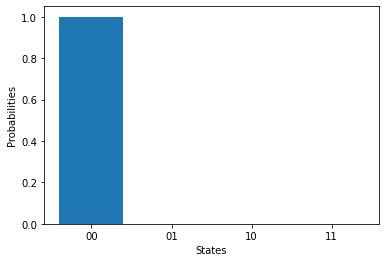

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


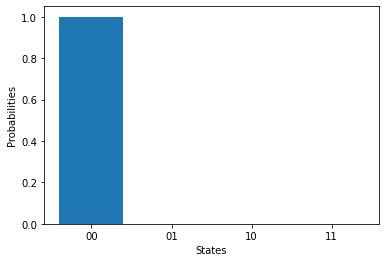

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


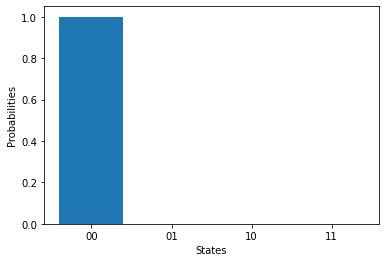

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


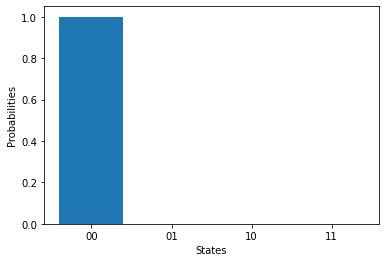

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


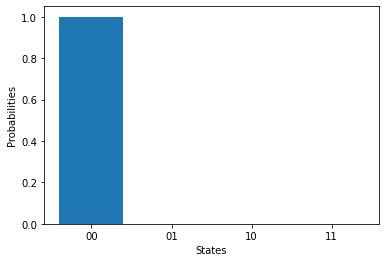

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


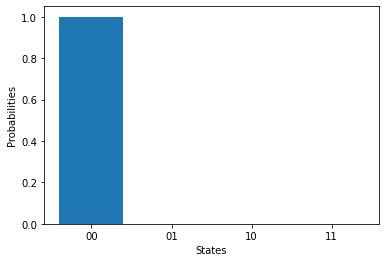

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


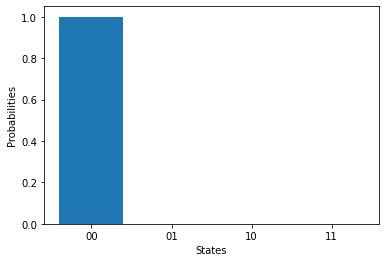

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


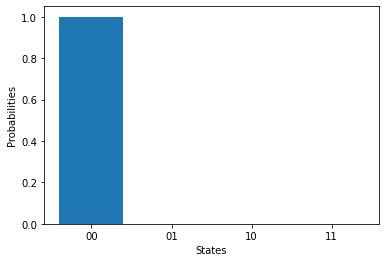

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


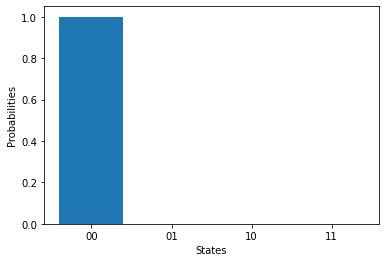

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


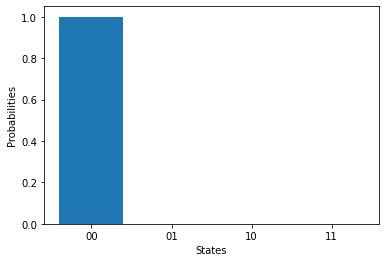

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


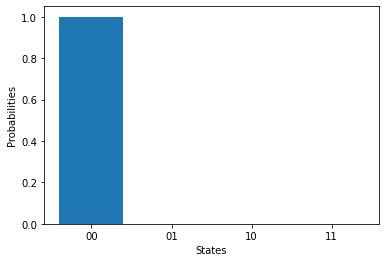

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


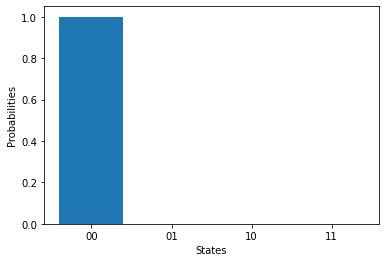

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


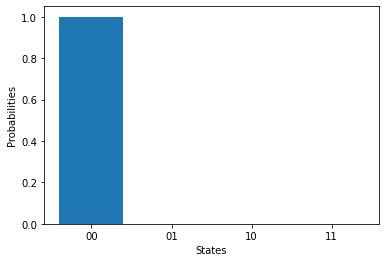

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


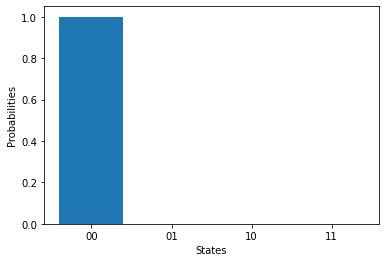

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


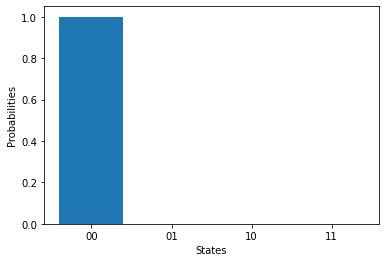

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


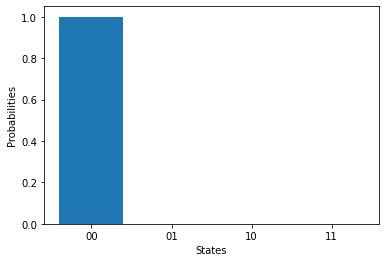

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


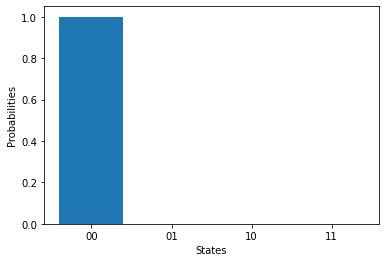

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


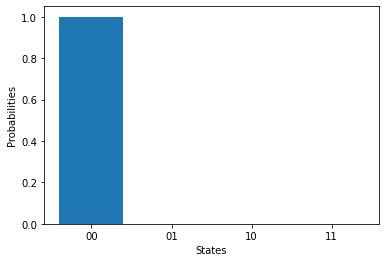

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


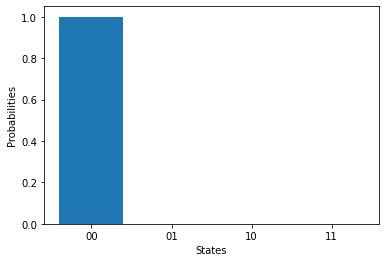

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


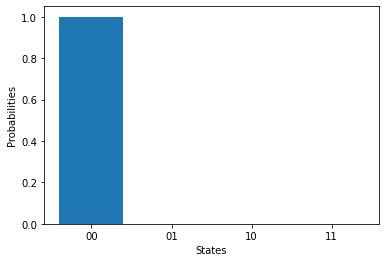

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


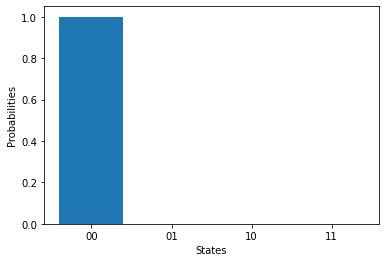

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


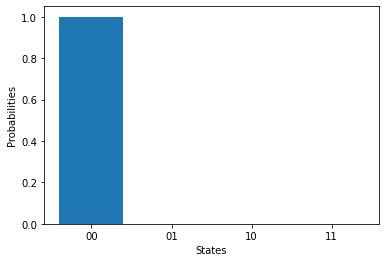

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


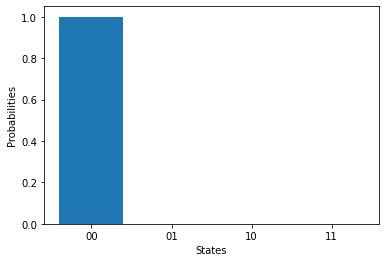

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


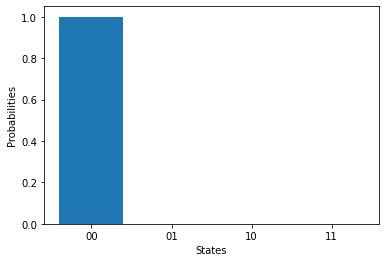

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


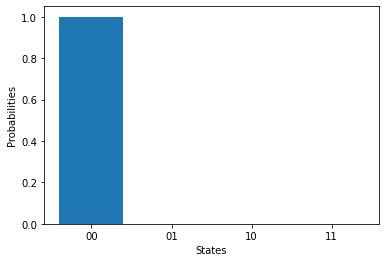

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


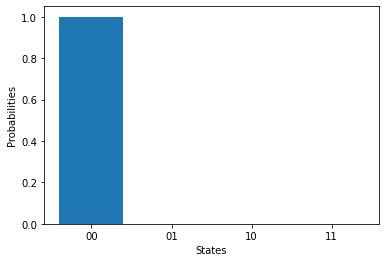

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


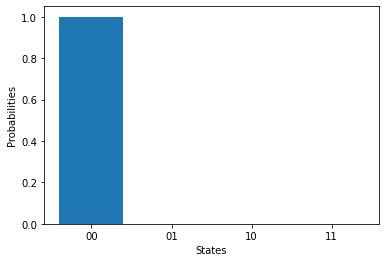

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


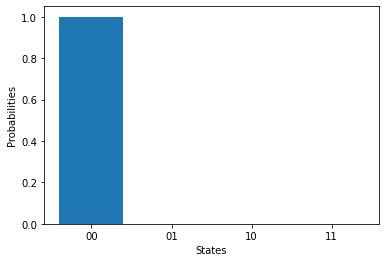

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


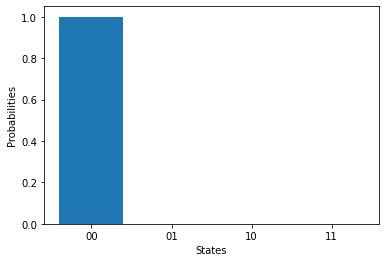

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


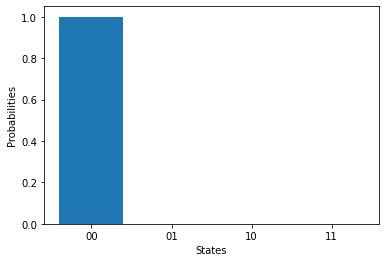

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


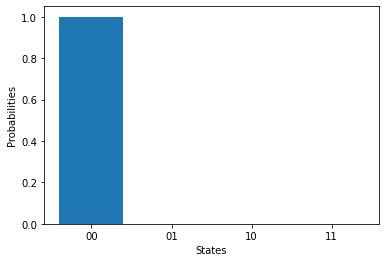

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


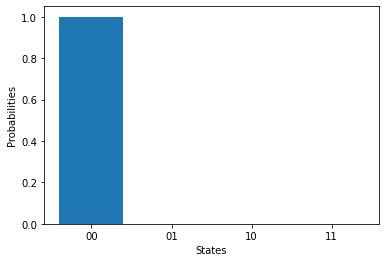

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


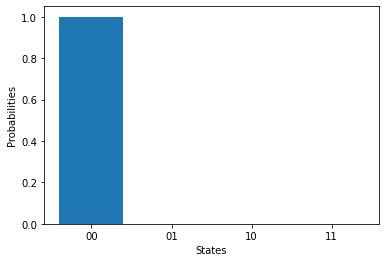

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


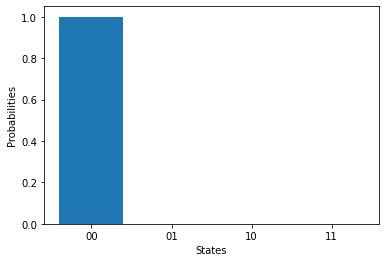

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--
q1--
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


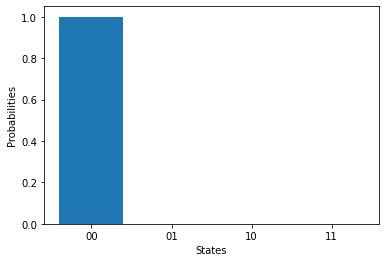

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--x
q1--x
           ░ ┌─┐   
q_0: ─|0>──░─┤M├───
           ░ └╥┘┌─┐
q_1: ─|0>──░──╫─┤M├
           ░  ║ └╥┘
c_0: ═════════╩══╬═
                 ║ 
c_1: ════════════╩═
                   
Tunneling failed... Try again


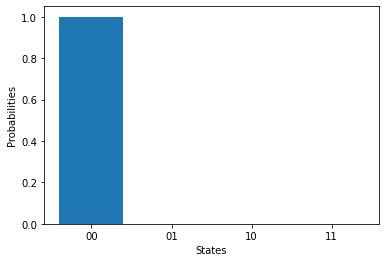

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)
q0--X
q1--X
          ┌───┐ ░ ┌─┐   
q_0: ─|0>─┤ X ├─░─┤M├───
          ├───┤ ░ └╥┘┌─┐
q_1: ─|0>─┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c_0: ══════════════╩══╬═
                      ║ 
c_1: ═════════════════╩═
                        


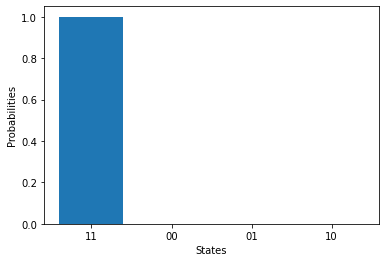

This is a simple representation of your position:

[[1 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [2 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


Congratulations!! You win!! 
NEXT LEVEL


Initial position:
[[1 2 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1]]


--------NEW MOVEMENT--------
Insert gates you want to apply (Ex: H-X-H-R)


In [ ]:
level=0
n = 0
player=Player()































pen=Pen()
for level in range(3):
    A = UserInteraction()
    print('Initial position:\n{}'.format(A.grid))
    while A.grid[5,0] != 2:
        coord = [-100+24,100]
        pos = [0,1]
        M = Movimiento(pos,coord)
        
        if n==0:
            #añado el nivel a la lista
            niveles=[]
            niveles.append(A.grid)
            M.iniciar_lab(niveles[0],A.grid)
            n += 1
            
        A.apply_gates()
        matrix = A.movement()[0]
        print('This is a simple representation of your position:\n')
        print(matrix)
        M.moviment(matrix) 
    if level==0:
        n=0
        print('\n')
        print('Congratulations!! You win!! ')
        print('NEXT LEVEL')
        print('\n')
    elif level==1:
        n=0
        print('\n')
        print('Congratulations!! You win!! ')
        print('NEXT LEVEL')
        print('\n')
    #level=level+1
    
print("Congratulations!!  You win!! ")
print('END OF THE GAME')